<a href="https://colab.research.google.com/github/anxosanchez/cheel/blob/main/Diagrama_P_x_y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
 from chemicals import CAS_from_any, Tb, Antoine

In [ ]:
CAS_1 = CAS_from_any('benzene')
CAS_2 = CAS_from_any('toluene')

In [ ]:
from chemicals import Antoine

In [ ]:
from chemicals.vapor_pressure import Psat_data_AntoinePoling

In [ ]:
AC_1 = Psat_data_AntoinePoling.loc[CAS_1]
AC_2 = Psat_data_AntoinePoling.loc[CAS_2]
Tb_1 = Tb(CAS_1)
Tb_2 = Tb(CAS_2) 

In [ ]:
print('A temperatura á que ferve o compoñente 1 é de {:5.3f} K ou {:5.3f} ºC.'.format(Tb_1,Tb_1 + 273.15))
print('A temperatura á que ferve o compoñente 2 é de {:5.3f} K ou {:5.3f} ºC.'.format(Tb_2,Tb_2 + 273.15))

A temperatura á que ferve o compoñente 1 é de 353.230 K ou 626.380 ºC.
A temperatura á que ferve o compoñente 2 é de 383.750 K ou 656.900 ºC.


In [ ]:
AC_1 = [AC_1.A, AC_1.B, AC_1.C]
AC_2 = [AC_2.A, AC_2.B, AC_2.C]

In [ ]:
def Psat_1(T):
  return 10 ** ( AC_1[0] - AC_1[1] / ( Tb_1 + AC_1[2] ) )

def Psat_2(T):
  return 10 ** ( AC_2[0] - AC_2[1] / ( Tb_2 + AC_2[2] ) )   

In [ ]:
y = np.linspace(0,1,num=101)
T = 303 # K

In [ ]:
P_bub = y * Psat_1(T) + ( 1 - y ) * Psat_2(T)
P = y * Psat_1(T) + ( 1 - y ) * Psat_2(T)

x = y * P / Psat_1(T)

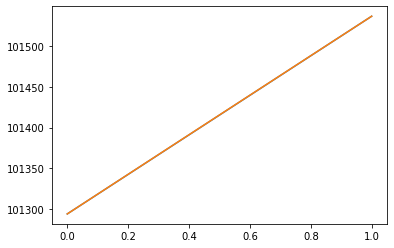

In [ ]:
plt.plot(y,P_bub,x,P_bub)

In [ ]:
print('A presión de saturación do compoñente 1 á temperatura de fervura ({:5.3f} K ou {:5.3f} ºC) é de {:5.3f} Pa ou {:5.3f} atm.'.format(Tb_1, Tb_1 + 273.15, Psat_1, Psat_1 * 9.869233e-6 ))
print('A presión de saturación do compoñente 2 á temperatura de fervura ({:5.3f} K ou {:5.3f} ºC) é de {:5.3f} Pa ou {:5.3f} atm.'.format(Tb_2, Tb_2 + 273.15, Psat_2, Psat_2 * 9.869233e-6 ))

A presión de saturación do compoñente 1 á temperatura de fervura (353.230 K ou 626.380 ºC) é de 101536.949 Pa ou 1.002 atm.
A presión de saturación do compoñente 2 á temperatura de fervura (383.750 K ou 656.900 ºC) é de 101293.765 Pa ou 1.000 atm.


In [ ]:
P2sat=10**(A2-B2/(388+C2))*10**(-5)
P2sat

In [ ]:
P_bub = x * P1sat + ( 1 -x ) * Psat
Pburb

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
y1=P1sat*x1/Pbub

In [ ]:
plt.plot(x1,Pbub,'b',y1,Pbub,'r')
plt.title("Diagrama P-x-y")
plt.grid('on')

In [ ]:
import math 

In [ ]:
T1=B1/(A1-math.log10(1.5*10**5))-C1
T1

In [ ]:
T2=B2/(A2-math.log10(1.5*10**5))-C2
T2

In [ ]:
temp=np.linspace(T2,T1,num=11)
temp

In [ ]:
pres1=(10**(A1-B1/(temp+C1)))*10**(-5)
pres1

In [ ]:
pres2=(10**(A2-B2/(temp+C2)))*10**(-5)
pres2

In [ ]:
x1n=(1.5-pres2)/(pres1-pres2)
x1n

In [ ]:
y1n=pres1*x1n/1.5
y1n

In [ ]:
y2n=pres2*(1-x1n)/1.5
y2n

In [ ]:
plt.plot(x1n,temp,y1n,temp)
plt.title("T-xy")